## Park_HeeJi_HW1.ipynb
- Student Name : Hee Ji Park
- Github Username : heejipark
- USC ID : 4090715830

### Required library

In [1]:
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import collections

from sklearn.metrics import accuracy_score

### (a) Download the Vertebral Column Data Set from: https://archive.ics.uci.edu/ml/datasets/Vertebral+Column.


In [2]:
data = arff.loadarff('./../../data/vertebral_column_data/column_2C_weka.arff')
df = pd.DataFrame(data[0])
print(np.unique(df['class']))
df.head()

[b'Abnormal' b'Normal']


pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0         63.027817    22.552586              39.609117     40.475232   
1         39.056951    10.060991              25.015378     28.995960   
2         68.832021    22.218482              50.092194     46.613539   
3         69.297008    24.652878              44.311238     44.644130   
4         49.712859     9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis        class  
0      98.672917                 -0.254400  b'Abnormal'  
1     114.405425                  4.564259  b'Abnormal'  
2     105.985135                 -3.530317  b'Abnormal'  
3     101.868495                 11.211523  b'Abnormal'  
4     108.168725                  7.918501  b'Abnormal'

In [3]:
np.unique(df['class'])

array([b'Abnormal', b'Normal'], dtype=object)

In [4]:
# Change the class names : Normal = 0, Abnormal = 1
# Applying the condition
df["class"] = np.where(df["class"] == b'Normal', 0, 1)
print(np.unique(df['class']))

[0 1]


### (b) Pre-Processing and Exploratory data analysis:
#### i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

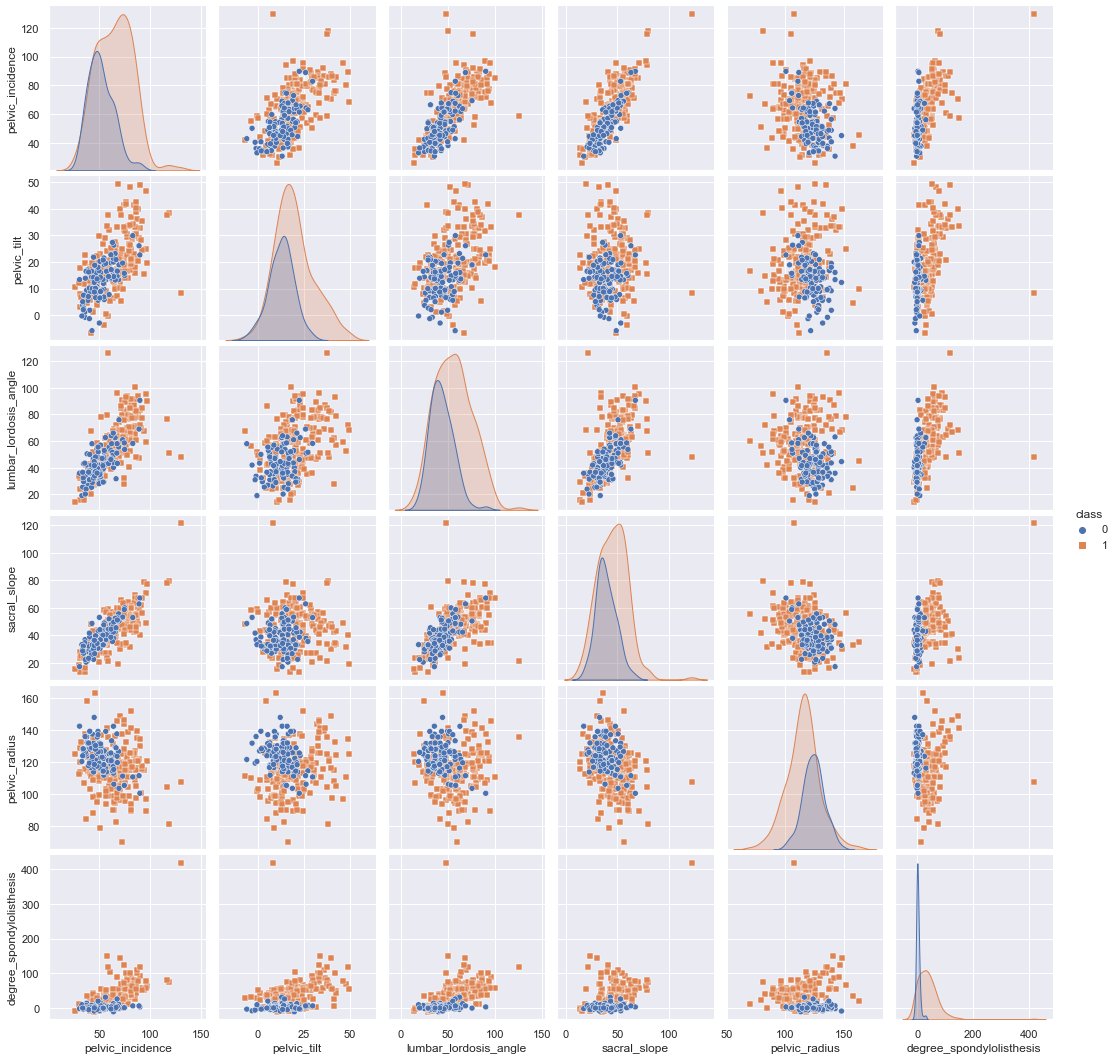

In [5]:
sns.set() # Setting seaborn as default style even if use only matplotlib
sns.pairplot(df, hue="class", markers=["o", "s"])

#### ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1 (see ISLR p. 129).

In [6]:
# Read all column names
print(df.columns)

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')


<AxesSubplot:xlabel='class', ylabel='degree_spondylolisthesis'>

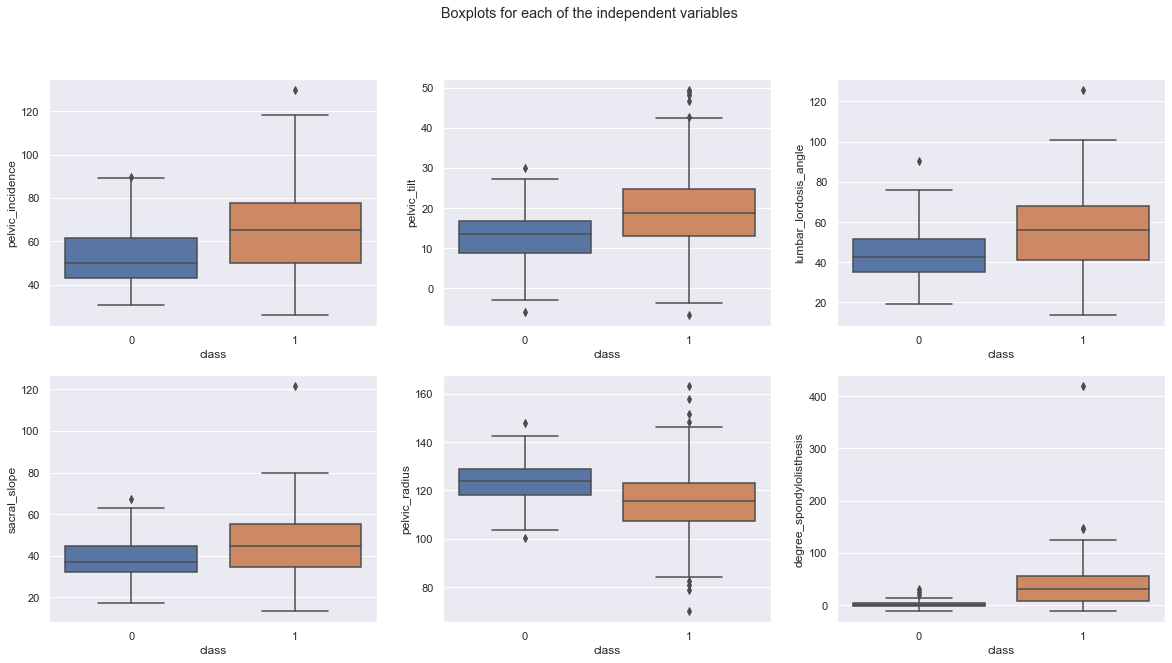

In [7]:
# Draw boxplots with six different independent variables
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('Boxplots for each of the independent variables')
sns.boxplot(ax=axes[0, 0], data=df, x='class', y='pelvic_incidence')
sns.boxplot(ax=axes[0, 1], data=df, x='class', y='pelvic_tilt')
sns.boxplot(ax=axes[0, 2], data=df, x='class', y='lumbar_lordosis_angle')
sns.boxplot(ax=axes[1, 0], data=df, x='class', y='sacral_slope')
sns.boxplot(ax=axes[1, 1], data=df, x='class', y='pelvic_radius')
sns.boxplot(ax=axes[1, 2], data=df, x='class', y='degree_spondylolisthesis')

#### iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.


In [8]:
dfNO = df[df['class'] == 0]
dfAB = df[df['class'] == 1]

dfNO_train, dfNO_test = dfNO[:70], dfNO[70:]
dfAB_train, dfAB_test = dfAB[:140], dfAB[140:]

train = pd.concat([dfNO_train, dfAB_train], ignore_index=True)
test = pd.concat([dfNO_test, dfAB_test], ignore_index=True)

print(len(train), len(test))

210 100


### (c) Classification using KNN on Vertebral Column Data Set

#### i. Write code for k-nearest neighbors with Euclidean metric (or use a software package).

In [9]:
# Create and fit a nearest-neighbor classifier
# Power parameter for the Minkowski metric. When P=2, it this is equivalent to using euclidean_distance(l2) for p = 2
# metric : Default is “minkowski”, which results in the standard Euclidean distance when p = 2.

knn = KNeighborsClassifier(n_neighbors=2, p=2)    
knn.fit(train.iloc[:,:-1], train.iloc[:,-1]) 

predicted = knn.predict(train.iloc[:,:-1])
print("Predictions from the classifier: \n", list(predicted))
print("Target values:\n", list(train.iloc[:,-1]))

Predictions from the classifier: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]
Target values:
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

#### ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. 

#### Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller increments of k. 

In [10]:
train_data, train_label = train.iloc[:,:-1], train.iloc[:,-1]
test_data, test_label = test.iloc[:,:-1], test.iloc[:,-1]
Ntrain = len(train_data)
Ntest = len(test_data)
kArray = np.arange(208,0,-3)
train_minError, train_minK = 1, 0
test_minError, test_minK = 1, 0
trainError = []
testError = []

for k in kArray:
    knn = KNeighborsClassifier(n_neighbors=k, p=2)    
    knn.fit(train_data, train_label) 
    
    # Calculate train --------------------------------------
    predicted_train = knn.predict(train_data)
    correct_train = list(predicted_train - train_label).count(0)
    kError_train = 1 - (correct_train / Ntrain)
    trainError.append(kError_train)
    if train_minError > kError_train and k > 1:
        train_minError = kError_train
        train_minK = k
    
    # Calculate test ---------------------------------------
    predicted = knn.predict(test_data)
    correct = list(predicted - test_label).count(0)
    kError = 1 - (correct / Ntest)
    testError.append(kError)
    if test_minError > kError and k > 1:
        test_minError = kError
        test_minK = k

In [11]:
# Print the result with whole k values and Error
print("All k values and error with train data")
for k, error in zip(kArray, trainError):
    print("[Train data] : k = %d, error = %.3f" %(k, error))

print()
print()

print("All k values and error with test data")
for k, error in zip(kArray, testError):
    print("[Test data] : k = %d, error = %f" %(k, error))


All k values and error with train data
[Train data] : k = 208, error = 0.333
[Train data] : k = 205, error = 0.333
[Train data] : k = 202, error = 0.333
[Train data] : k = 199, error = 0.333
[Train data] : k = 196, error = 0.333
[Train data] : k = 193, error = 0.333
[Train data] : k = 190, error = 0.333
[Train data] : k = 187, error = 0.333
[Train data] : k = 184, error = 0.333
[Train data] : k = 181, error = 0.333
[Train data] : k = 178, error = 0.333
[Train data] : k = 175, error = 0.333
[Train data] : k = 172, error = 0.333
[Train data] : k = 169, error = 0.333
[Train data] : k = 166, error = 0.333
[Train data] : k = 163, error = 0.333
[Train data] : k = 160, error = 0.333
[Train data] : k = 157, error = 0.333
[Train data] : k = 154, error = 0.333
[Train data] : k = 151, error = 0.333
[Train data] : k = 148, error = 0.333
[Train data] : k = 145, error = 0.333
[Train data] : k = 142, error = 0.333
[Train data] : k = 139, error = 0.333
[Train data] : k = 136, error = 0.310
[Train data

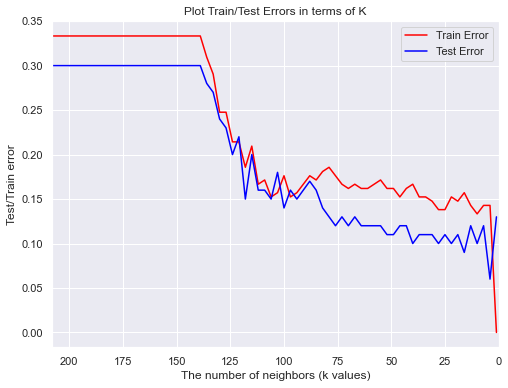

In [12]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6))
fig = plt.plot(kArray, trainError, color='red',label='Train Error')
fig = plt.plot(kArray, testError, color='blue',label='Test Error')
plt.xlim([208, 0])
plt.xlabel('The number of neighbors (k values)')
plt.ylabel('Test/Train error')
plt.title('Plot Train/Test Errors in terms of K')
plt.legend()

#### Which k∗ is the most suitable k among those values? 

In [13]:
print("The most suitable k = %d for train data, error rate = %f"%(train_minK, train_minError))
print("The most suitable k = %d for test data, error rate = %f"%(test_minK, test_minError))

The most suitable k = 10 for train data, error rate = 0.133333
The most suitable k = 4 for test data, error rate = 0.060000


#### Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k∗.2

In [14]:
# Calculate the confusion matrix
knn = KNeighborsClassifier(n_neighbors= test_minK, p=2)
knn.fit(train_data, train_label)
predicted = knn.predict(test_data)
confusionMatrix = confusion_matrix(test_label, predicted)
print("Confusion matrix:\n", confusionMatrix)

Confusion matrix:
 [[25  5]
 [ 1 69]]


In [15]:
# Calculate true positive rate, true negative rate
TruePos = confusionMatrix[0][0] / (confusionMatrix[0][0] + confusionMatrix[0][1])
print("True postive rate: ", TruePos)
TrueNeg = confusionMatrix[1][1] / (confusionMatrix[1][0] + confusionMatrix[1][1])
print("True negative rate: ", TrueNeg)

True postive rate:  0.8333333333333334
True negative rate:  0.9857142857142858


In [16]:
# Cacluate precision and F1-score
# classification_report provides f1-score and precision values
print("Precision and F1-score: \n\n", classification_report(test_label, predicted))

Precision and F1-score: 

               precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.93      0.99      0.96        70

    accuracy                           0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100



#### iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate,3 which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10,20,30,...,210}.4 Note: for each N, select your training set by choosing the first ⌊N/3⌋ rows of Class 0 and the first N − ⌊N/3⌋ rows of Class 1 in the training set you created in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1,6,11,...,196}. This plot is called a Learning Curve.
Let us further explore some variants of KNN.

In [17]:
nArray = np.arange(10,220,10)
errorArray = []
optimalArray = []
for N in nArray:
    ndfNO = dfNO_train[:int(N/3)]
    ndfAB = dfAB_train[:N-int(N/3)]
    
    df_train = pd.concat([ndfNO, ndfAB], ignore_index=True)
    df_test = pd.concat([dfNO_test, dfAB_test], ignore_index=True)
    
    df_train_data, df_train_label = df_train.iloc[:,:-1], df_train.iloc[:,-1]
    df_test_data, df_test_label = df_test.iloc[:,:-1], df_test.iloc[:,-1]
    minError = 1
    minK = 0
    
    for k in range(1,N,5):
        knn = KNeighborsClassifier(n_neighbors=k, p=2)    
        knn.fit(df_train_data, df_train_label) 
        df_predicted = knn.predict(df_test_data)
        correct = list(df_predicted - df_test_label).count(0)
        kError = 1 - (correct / len(df_test_label))
        
        if minError > kError and k > 1:
            minError = kError
            minK = k
        
    errorArray.append(minError) # Store error rate into errorArray
    optimalArray.append(minK)   # Store optimal k value into optimalArray
    print("When N is %d, \n \
          1. The number of train data is %d. \n \
          2. The most suitable k is %d. \n \
          3. Error rate is %f" %(N, len(df_train), minK, minError))

When N is 10, 
           1. The number of train data is 10. 
           2. The most suitable k is 6. 
           3. Error rate is 0.330000
When N is 20, 
           1. The number of train data is 20. 
           2. The most suitable k is 6. 
           3. Error rate is 0.200000
When N is 30, 
           1. The number of train data is 30. 
           2. The most suitable k is 6. 
           3. Error rate is 0.240000
When N is 40, 
           1. The number of train data is 40. 
           2. The most suitable k is 11. 
           3. Error rate is 0.250000
When N is 50, 
           1. The number of train data is 50. 
           2. The most suitable k is 26. 
           3. Error rate is 0.300000
When N is 60, 
           1. The number of train data is 60. 
           2. The most suitable k is 21. 
           3. Error rate is 0.290000
When N is 70, 
           1. The number of train data is 70. 
           2. The most suitable k is 26. 
           3. Error rate is 0.290000
When N is 80, 
 

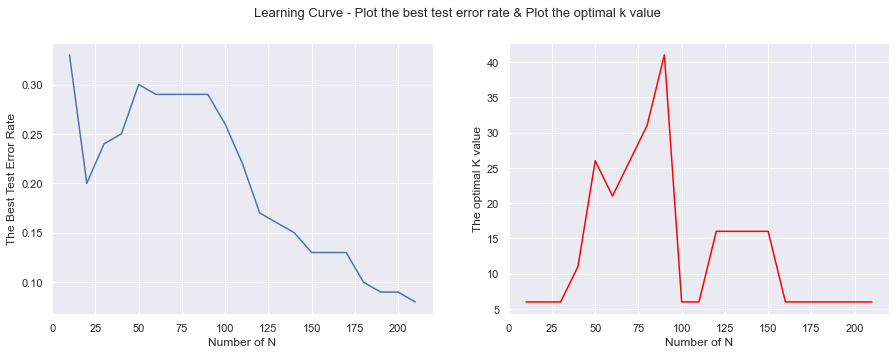

In [18]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 5)
fig.suptitle('Learning Curve - Plot the best test error rate & Plot the optimal k value', fontsize=13)

axes[0].plot(nArray, errorArray)
axes[0].set_xlabel('Number of N')
axes[0].set_ylabel('The Best Test Error Rate')

axes[1].plot(nArray, optimalArray, color='red')
axes[1].set_xlabel('Number of N')
axes[1].set_ylabel('The optimal K value')

print()

### (d) Replace the Euclidean metric with the following metrics5 and test them. 
Summarize the test errors (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1,6,11,...,196}.

#### i. Minkowski Distance:
#### A. which becomes Manhattan Distance with p = 1.

In [19]:
summary = collections.defaultdict(list)
N = len(test_data)
minError = 1
optimalK = 0

for k in range(1, 200, 5): 
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan', p=1) # p = 1: Manhattan Distance
    knn.fit(train_data, train_label) 

    predicted = knn.predict(test_data)
    correct = list(predicted - test_label).count(0)
    kError = 1 - (correct / N)
    
    if minError > kError and k > 1:
        minError = kError
        optimalK = k
    
summary['Manhatten_Distance'] =[optimalK, minError]
print("Manhatten Distance:\n The most suitable k = %d, error rate = %f"%(optimalK, minError))

Manhatten Distance:
 The most suitable k = 6, error rate = 0.110000


#### B. with log10(p) ∈ {0.1,0.2,0.3,...,1}. 
In this case, use the k∗ you found for the Manhattan distance in 1(d)iA. What is the best log10(p)?

In [20]:
N = len(test_data)
minError = 1
optimalP = 1
i = 0.1
while i <= 1:
    i = round(i, 1)
    knn = KNeighborsClassifier(n_neighbors=summary['Manhatten_Distance'][0], metric='manhattan', p=pow(10,i))
    knn.fit(train_data, train_label) 

    predicted = knn.predict(test_data)
    correct = list(predicted - test_label).count(0)
    kError = 1 - (correct / N)
    
    if minError > kError and k > 1:
        minError = kError
        optimalP = i
        
    i = i + 0.1
    
#summary['Manhatten_Distance_log10(p)'] = optimalP
print("Manhatten Distance with log10(p):\n The most suitable p = %0.1f, error rate = %f"%(optimalP, minError))

Manhatten Distance with log10(p):
 The most suitable p = 0.1, error rate = 0.110000


### C. which becomes Chebyshev Distance with p → ∞ 

In [21]:
N = len(test_data)
minError = 1
optimalK = 0

for k in range(1, 200, 5):
    knn = KNeighborsClassifier(n_neighbors=k, metric = 'chebyshev', p=float('inf')) 
    knn.fit(train_data, train_label) 

    predicted = knn.predict(test_data)
    correct = list(predicted - test_label).count(0)
    kError = 1 - (correct / N)
    
    if minError > kError and k > 1:
        minError = kError
        optimalK = k
    
summary['Chebyshev_Distance'] = [optimalK, minError]
print("Chebyshev Distance with p->∞ :\n The most suitable k = %d, error rate = %f"%(optimalK, minError))

Chebyshev Distance with p->∞ :
 The most suitable k = 16, error rate = 0.080000


### ii. Mahalanobis Distance.

In [22]:
N = len(test_data)
minError = 1
optimalK = 0
for k in range(1, 200, 5):
    #knn = KNeighborsClassifier(n_neighbors= k, metric='mahalanobis', metric_params={'V': np.cov(train_data, rowvar=False)})
    knn = KNeighborsClassifier(n_neighbors= k, metric='mahalanobis', metric_params={'VI': np.linalg.inv(np.cov(train_data.T))})
    knn.fit(train_data, train_label) 

    predicted = knn.predict(test_data)
    correct = list(predicted - test_label).count(0)
    kError = 1 - (correct / N)
    
    if minError > kError and k > 1:
        minError = kError
        optimalK = k
    
summary['Mahalanobis_Distance'] = [optimalK, minError]
print("Mahalanobis Distance:\n The most suitable k = %d, error rate = %f"%(optimalK, minError))

Mahalanobis Distance:
 The most suitable k = 6, error rate = 0.150000


#### Summarize the test errors (i.e., when k = k∗) in a table.

In [23]:
report = pd.DataFrame.from_dict(summary, orient='index', columns=['Optimal k', 'Error Rate'])
report

Optimal k  Error Rate
Manhatten_Distance            6        0.11
Chebyshev_Distance           16        0.08
Mahalanobis_Distance          6        0.15

### (e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. 

In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1,6,11,16,...,196}.


In [24]:
weights = collections.defaultdict(list)
N = len(test_data)
minError = 1
optimalK = 0

for k in range(1, 200, 5): 
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean', p=2, weights = 'distance') # p = 2: Euclidean Distance
    knn.fit(train_data, train_label) 

    predicted = knn.predict(test_data)
    correct = list(predicted - test_label).count(0)
    kError = 1 - (correct / N)
    
    if minError > kError and k > 1:
        minError = kError
        optimalK = k
    
weights['Euclidean_Distance with weighted decision'] =[optimalK, minError]
print("Euclidean Distance with weighted decision:\n The most suitable k = %d, error rate = %f"%(optimalK, minError))

Euclidean Distance with weighted decision:
 The most suitable k = 6, error rate = 0.100000


In [25]:
N = len(test_data)
minError = 1
optimalK = 0

for k in range(1, 200, 5): 
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan', p=1, weights = 'distance') # p = 1: Manhattan Distance
    knn.fit(train_data, train_label) 

    predicted = knn.predict(test_data)
    correct = list(predicted - test_label).count(0)
    kError = 1 - (correct / N)
    
    if minError > kError and k > 1:
        minError = kError
        optimalK = k
    
weights['Manhatten_Distance with weighted decision'] =[optimalK, minError]
print("Manhatten Distance with weighted decision:\n The most suitable k = %d, error rate = %f"%(optimalK, minError))

Manhatten Distance with weighted decision:
 The most suitable k = 26, error rate = 0.100000


In [26]:
N = len(test_data)
minError = 1
optimalK = 0

for k in range(1, 200, 5):
    knn = KNeighborsClassifier(n_neighbors=k, metric = 'chebyshev', p=float('inf'), weights = 'distance') 
    knn.fit(train_data, train_label) 

    predicted = knn.predict(test_data)
    correct = list(predicted - test_label).count(0)
    kError = 1 - (correct / N)
    
    if minError > kError and k > 1:
        minError = kError
        optimalK = k
    
weights['Chebyshev_Distance with weighted decision'] = [optimalK, minError]
print("Chebyshev Distance with weighted decision:\n The most suitable k = %d, error rate = %f"%(optimalK, minError))

Chebyshev Distance with weighted decision:
 The most suitable k = 16, error rate = 0.110000


In [27]:
report = pd.DataFrame.from_dict(weights, orient='index', columns=['Optimal k', 'Error Rate'])
report['Error Rate (%)'] = report['Error Rate'] * 100
report

Optimal k  Error Rate  \
Euclidean_Distance with weighted decision          6        0.10   
Manhatten_Distance with weighted decision         26        0.10   
Chebyshev_Distance with weighted decision         16        0.11   

                                           Error Rate (%)  
Euclidean_Distance with weighted decision            10.0  
Manhatten_Distance with weighted decision            10.0  
Chebyshev_Distance with weighted decision            11.0

### (f) What is the lowest training error rate you achieved in this homework?

Answer => The lowest training error rate is KNeighborsClassifier using Euclidean Distance (k=6) and Manhatten Distance (k=26)

### Reference

1. boxplot : https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8
2. KNeighbor :https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
3. figure, subplot : https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.suptitle